In [33]:
import seaborn as sns
import sklearn as sk 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

### Short description of Linear Regression
Linear regression is used to estimate the relationship between two quantitative variables. The most important outcome of this test are the regression coefficient and the *p* value. The *p* value tells us how likely we are to see the estimated effect of income on happiness if the null hypothesis of no effect were true. The regression coefficient tells us how strong the relationship is between the two variables. 

In [4]:
df = pd.read_csv('Mashable.csv')
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


### Subsetting on 5 different variables

In [5]:
df_subset = df[['global_subjectivity', 'global_sentiment_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'shares']]
df_subset.head()

,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares
0,0.439379,0.082486,0.666667,0.375,2100
1,0.300454,0.027715,0.000000,0.000,274
2,0.575486,0.259120,0.000000,0.000,1500
3,0.327220,0.134424,0.000000,0.000,2000
4,0.507709,0.109256,0.000000,0.000,6000


I have chosen the above mentioned 5 variables as I think that a striking article which creates a discussion point due to put forward opinions tends to gather more attention and raise interest for the readers. This difference in opinion or 'subjectivity' tends to create polarity as well. Therefore, I find it interesting to see whether there is a correlation between factors like subjectivity or polarity and the amnount of shares. 

### Plotting the subsetted dataframe

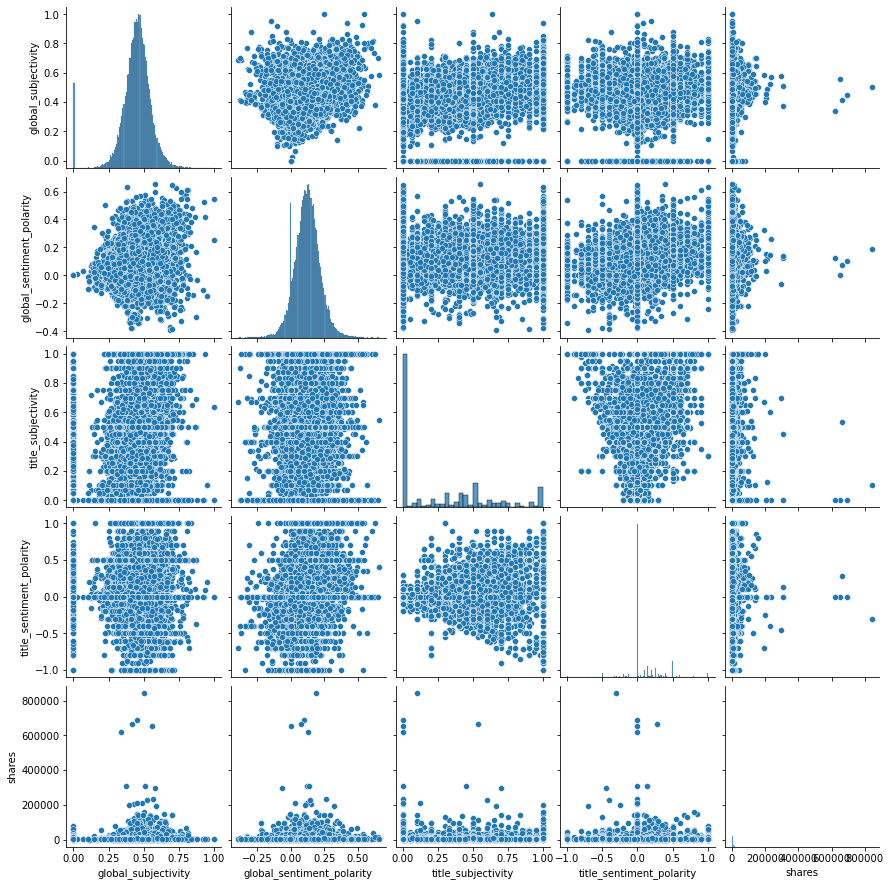

In [8]:
sns.pairplot(df_subset)
plt.show()


I will try to find a relation between the 4 variables and shares. I will plot gobal_sentiment_polarity on the x-asis, because that is more likely to be the cause of shares, than vice versa. Therefore, global_sentiment_polarity  is the independent variable, shares the dependent variable.

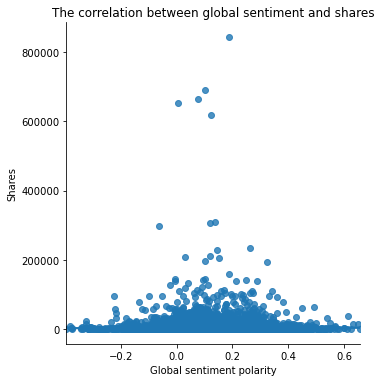

In [18]:
sns.lmplot(x='global_sentiment_polarity', y='shares', data=df_subset)
plt.title('The correlation between global sentiment and shares')
plt.xlabel("Global sentiment polarity")
plt.ylabel("Shares")
plt.show()

We can see that this graph represents a normal distribution. In addition, the majority of the dots are positioned close to the line. There are some outliers with shares increasing around a global sentiment of 0.0 to 0.4. 

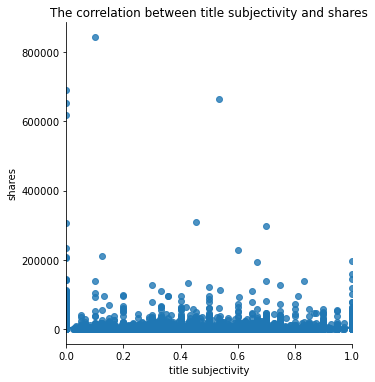

In [17]:
sns.lmplot(x='title_subjectivity', y='shares', data=df_subset)
plt.title('The correlation between title subjectivity and shares')
plt.xlabel("title subjectivity")
plt.ylabel("shares")
plt.show()

Here we can see a uniform distribution which means that the outcomes are equally likely to happen. Therefore we can assume that there is no real correlation between title subjectivity and shares. However, the majority of the dots are positioned close to the line. There are many outliers tho. 

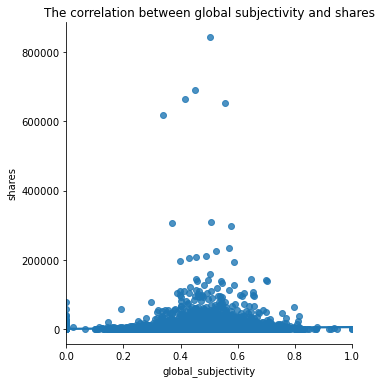

In [13]:
sns.lmplot(x='global_subjectivity', y='shares', data=df_subset)
plt.title('The correlation between global subjectivity and shares')
plt.xlabel("global_subjectivity")
plt.ylabel("shares")
plt.show()

Here we can see a normal distribution. In addition, the majority of the dots are positioned close to the line. There are some outliers with shares increasing around a global subjectivity score of 0.4 to 0.8. 

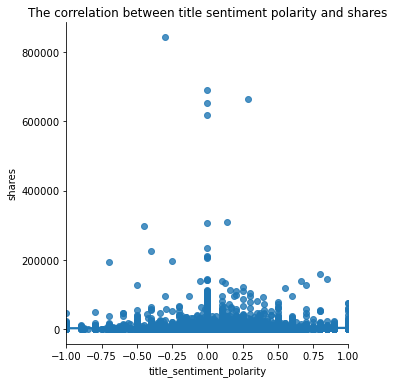

In [16]:
sns.lmplot(x='title_sentiment_polarity', y='shares', data=df_subset)
plt.title('The correlation between title sentiment polarity and shares')
plt.xlabel("title_sentiment_polarity")
plt.ylabel("shares")
plt.show()

We can see that the biggest outliers in shares are exactly on the 0.0 title sentiment polarity score. In addition, the majority of dots are positioned close to the line. 

In [21]:
from sklearn.linear_model import LinearRegression 

x = df[['global_sentiment_polarity']] 
y = df['shares_log']
lm = LinearRegression() 
lm.fit(x, y) 

b0 = lm.intercept_ 
b1 = lm.coef_[0] 

print(f"The regression line is equal to y = {b0:.3f} + {b1:.3f}X") 

The regression line is equal to y = 3.227 + 0.225X


In [24]:
df['shares_log_p'] = lm.predict(x) 
df.head(10)

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log,shares_log_p
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0.439379,0.082486,0.666667,0.375000,2100,3.245447,3.245447
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0.300454,0.027715,0.000000,0.000000,274,3.233134,3.233134
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,0,0,0,0.575486,0.259120,0.000000,0.000000,1500,3.285155,3.285155
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0.327220,0.134424,0.000000,0.000000,2000,3.257123,3.257123
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0.507709,0.109256,0.000000,0.000000,6000,3.251465,3.251465
5,6,http://mashable.com/2014/04/24/amazing-lebron-...,13,303,2,0,4.970297,0,0,0,...,0,0,0,0.394298,0.048684,0.000000,0.000000,1200,3.237848,3.237848
6,7,http://mashable.com/2013/06/22/social-media-we...,6,544,11,0,4.617647,0,0,0,...,1,0,1,0.439512,0.267391,0.500000,0.500000,3500,3.287014,3.287014
7,8,http://mashable.com/2013/07/09/russian-deletes...,12,223,1,0,4.399103,0,0,0,...,0,0,0,0.394792,0.053125,0.218182,0.145455,1500,3.238846,3.238846
8,9,http://mashable.com/2013/03/07/3d-printed-skull/,8,438,1,0,5.027397,0,0,0,...,0,0,0,0.479187,0.166913,0.500000,0.200000,3100,3.264426,3.264426
9,10,http://mashable.com/2013/11/16/xbox-one-vs-pla...,11,389,1,1,4.642674,0,0,1,...,1,0,1,0.417229,0.183895,0.166667,0.000000,27300,3.268244,3.268244


### The following part is still quite hard for me, might need some more consultation or explanation on this for coming Friday. I am aware that splitting the dataset was mentioned in Wednesday's lecture but I am not sure on how to do this. A small explanation on this would be great.

In [27]:
x = df[['global_sentiment_polarity']] 
y = df['shares_log'] 
lm = LinearRegression() 
lm.fit(x, y) 

df['shares_log'] = lm.predict(x) 
df['resid'] = df['shares_log'] - df['shares_log_p'] 

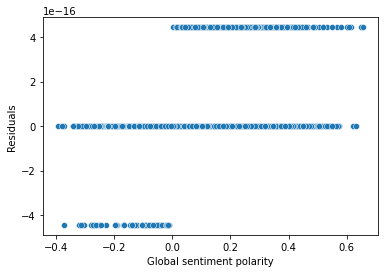

In [28]:
sns.scatterplot(x='global_sentiment_polarity',y='resid',data=df)
plt.xlabel('Global sentiment polarity')
plt.ylabel('Residuals')
plt.show()

In [31]:
r2_score(df['shares_log'], df['shares_log_p'])

1.0

In [34]:
math.sqrt(mean_squared_error(df['shares_log'], df['shares_log_p']))

1.2926230046797838e-16